# 01 Jupyter Notebook užduotis (2022.05)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pasiimti duomenis iš trijų šaltinių:
    - Environmental_Data_Deep_Moor_2013, 
    - Environmental_Data_Deep_Moor_2014, 
    - Environmental_Data_Deep_Moor_2015

### Duomenų paėmimui ir darbui su duomenis naudojame tris pagrindines funkcijas:

In [39]:
def get_df(year):
    return pd.read_csv('Environmental_Data_Deep_Moor_{}.csv'.format(year))

In [40]:
def monthly_avg_calc(month, column):
    return df[df['date'].str.contains('201[345]_[0]?' + str(month))][column].mean()

In [41]:
def yearly_avg(category):
    return list(map(lambda m: monthly_avg_calc(m, category), range(1,13)))

### Nubraižyti Line grafiką kiekvieno mėnesio 2013 metų oro temperatūros vidurkį.

In [42]:
df = get_df('2013')

In [43]:
df.head()

,date,time,Air_Temp,Barometric_Press,Dew_Point,Relative_Humidity,Wind_Dir,Wind_Gust,Wind_Speed
0,2013_01_01,0:03:23,30.8,28.3,21.3,67.4,98.6,4,0.0
1,2013_01_01,6:29:08,28.0,28.4,24.2,85.2,61.8,2,0.0
2,2013_01_01,6:35:16,28.1,28.4,24.6,86.6,52.2,1,0.0
3,2013_01_01,6:41:25,28.1,28.4,24.6,86.4,62.8,2,0.0
4,2013_01_01,6:47:33,28.0,28.4,24.3,85.6,45.6,2,0.2


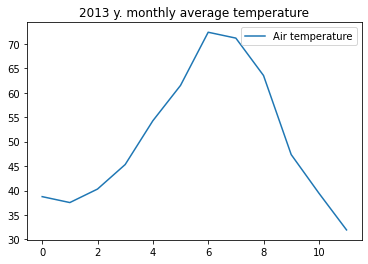

In [44]:
plt.plot(yearly_avg('Air_Temp'), label='Air temperature')
plt.title('2013 y. monthly average temperature')
plt.legend()
plt.show()

### Nubraižyti Line grafiką kiekvieno mėnesio 2014 metų oro temperatūros vidurkį.

In [45]:
df = get_df('2014')

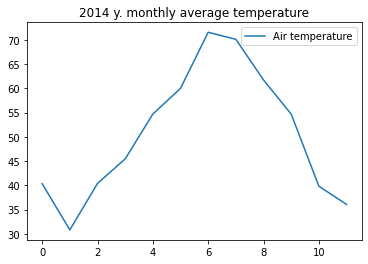

In [46]:
plt.plot(yearly_avg('Air_Temp'), label='Air temperature')
plt.title('2014 y. monthly average temperature')
plt.legend()
plt.show()

### Nubraižyti Line grafiką kiekvieno mėnesio 2015 metų oro temperatūros vidurkį.

In [48]:
df = get_df('2015')

In [30]:
def yearly_avg(category):
    return list(map(lambda m: monthly_avg_calc(m, category), range(1,13)))

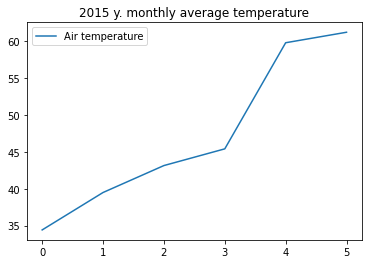

In [49]:
plt.plot(yearly_avg('Air_Temp'), label='Air temperature')
plt.title('2015 y. monthly average temperature')
plt.legend()
plt.show()

### Nubraižyti Bar grafiką metinio 2013-2015 metų oro temperatūros vidurkį.
- Lentelėje atvaizduoti karščiausią kiekvienų metų dieną ir temperatūrą.
- Lentelėje atvaizduoti šalčiausią kiekvienų metų dieną ir temperatūrą.

In [67]:
def get_years(arr_years):
    newarr=[];
    for x in arr_years:
        df = get_df(x)
        newarr.append(df)
    return newarr

In [68]:
arr = [2013, 2014, 2015]

In [69]:
heights = [year['Air_Temp'].mean() for year in get_years(arr)]

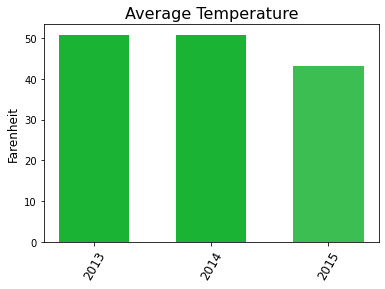

In [72]:
alphas = [height/max(heights) for height in heights]
colors = [(.1,.7,.2,a) for a in alphas]
plt.bar(arr, heights, .6, color=colors)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
plt.xticks(np.arange(2013,2016,1), rotation=60, fontsize=12)
plt.show()

In [79]:
def max_temp(y):
    return y[y['Air_Temp']==y['Air_Temp'].max()]

In [80]:
def min_temp(y):
    return y[y['Air_Temp']==y['Air_Temp'].min()]

In [81]:
def min_max_temps(arr):
    return[(max_temp(y)['Air_Temp'].values[0],
           max_temp(y)['date'].values[0],
           min_temp(y)['Air_Temp'].values[0],
           min_temp(y)['date'].values[0]
           )for y in get_years(arr)]

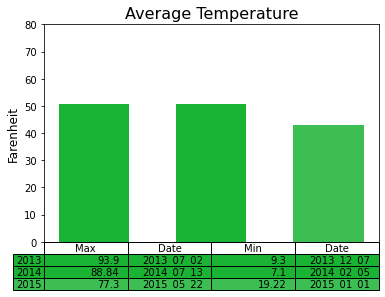

In [102]:
plt.bar(arr, heights, .6, color=colors)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
rows = ['2013', '2014', '2015']
columns = ['Max', 'Date', 'Min', 'Date']
plt.table(cellText=min_max_temps(arr),
         rowLabels=rows,
         colLabels=columns,
         rowColours=colors,
         cellColours=[[c]*4 for c in colors])
plt.xticks([])
plt.ylim(0,80)
plt.show()